In [31]:
pip install h5py

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import skycoord_to_pixel
import astropy.units as u

In [4]:
SGA = Table.read("/global/homes/b/barnerg/DESI_SGA/Morphology/SGA_morph.fits")

In [5]:
SGA

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT,g_r,r_z,g_z,r90,r50,r20,z50,g50,C_r50_r90,C_r20_r90,m(r50),m(z50),m(g50),Delta(g_r),Delta(g_z),Delta(r_z),HUBBLE_TYPE
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
284583,SGA-2020 284583,PGC1753576,1753576,246.63893700000006,25.882395000000002,E,83.58,0.4168694,0.61659503,0.049369153,23.009481,16.281,False,LEDA-20181114,102768,2MASXJ16263037+2552589_GROUP,3,False,246.63132430980986,25.886678155342814,0.92581606,2465p260,246.63899443421053,25.88239593752038,1.0317777,SB26,89.25743,0.7660097,246.63894134159338,25.882421271706928,21.809486,7.683644,7.267518,6.908575,6.584644,8.19172,10.043491,12.2072115,14.66538,17.695236,21.416355,25.87598,30.953333,16.50979,15.567412,14.869183,16.380758,15.444356,14.747147,16.275633,15.342991,14.648945,16.190153,15.260059,14.5695095,16.121006,15.193452,14.5059595,16.06036,15.134916,14.4499445,16.00693,15.085361,14.402035,15.962352,15.040784,14.35771,15.920147,15.0014,14.320146,0.030591438,0.04308892,0.045999907,0.04829483,0.06055945,0.080751404,0.0973,0.124484144,0.20583051,0.01532438,0.015401917,0.015267819,0.013852132,0.013975341,0.01385223,0.012736728,0.012889164,0.012807729,0.0118285,0.011991284,0.011952993,0.011088653,0.011258294,0.011255878,0.01050395,0.010681791,0.010707616,0.010012423,0.010216223,0.010258886,0.009653168,0.009853663,0.009897824,0.0092963725,0.009511294,0.009575142,15.662999,7318.958,8.404456e-05,0.7656309,0.11777708,14.75623

In [6]:
path = '/pscratch/sd/b/barnerg/Figures/'

In [7]:
fits_file = fits.open(path +'Gal99694.fits')
fits_file[0].header
image_data = fits_file[0].data
fits_file.close()

In [8]:
pixel_values = image_data
#pixel_values = image_data.flatten()

In [9]:
pixel_values.shape
#pixel_values

(3, 152, 152)

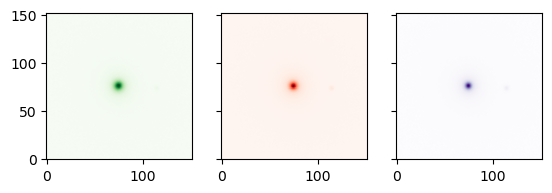

In [10]:
# Reshape the data if needed
# if image_data.shape[0] == 3:
#     image_data = np.transpose(image_data, (1, 2, 0))

plt.figure()
ax1=plt.subplot(131)
plt.imshow(pixel_values[0], origin='lower', cmap='Greens')
plt.subplot(132, sharey=ax1)
plt.imshow(pixel_values[1], origin='lower', cmap='Reds')
plt.tick_params('y', labelleft=False)
plt.subplot(133, sharey=ax1)
plt.imshow(pixel_values[2], origin='lower', cmap='Purples')
plt.tick_params('y', labelleft=False);

In [11]:
i=0
while i < len(SGA):
    if SGA['SGA_ID'][i] == 99694:
        print(i)
    i+=1

10564


In [12]:
SGA[:][10564]

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT,g_r,r_z,g_z,r90,r50,r20,z50,g50,C_r50_r90,C_r20_r90,m(r50),m(z50),m(g50),Delta(g_r),Delta(g_z),Delta(r_z),HUBBLE_TYPE
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
99694,SGA-2020 99694,2MASXJ13484167+0514015,3396864,207.173556,5.233642400000001,E,0.0,0.55718577,0.91201085,0.078486964,23.673481,16.315,False,LEDA-20181114,35736,2MASXJ13484167+0514015,1,True,207.173556,5.233642400000001,0.55718577,2072p052,207.17360447291705,5.233657155477401,0.85346884,SB26,28.2334,0.9122929,207.17351812478822,5.233739382938335,19.560287,5.4049926,5.0518017,5.113506,5.7952824,7.25721,9.029454,11.146906,13.610425,16.415876,19.43479,22.519297,25.604065,16.417116,15.485226,14.838438,16.301947,15.375892,14.726835,16.201284,15.279999,14.632017,16.116356,15.197621,14.549995,16.045063,15.128491,14.480841,15.987096,15.071379,14.424522,15.940611,15.026282,14.3804,15.904682,14.991908,14.346588,15.880553,14.967294,14.32185,0.007941751,0.008757056,0.014317811,0.022009848,0.026945533,0.03760729,0.038810104,0.08814515,0.11336638,0.0039672405,0.006952994,0.0061916183,0.0036598465,0.006179371,0.005656679,0.0033619963,0.0058029154,0.005185754,0.00315283,0.0053929896,0.004831151,0.0030055675,0.004961625,0.004575602,0.0028615163,0.0048175827,0.004338494,0.002768823,0.004629765,0.0041827327,0.0027250287,0.00440016,0.0040954323,0.0026984639,0.004310289,0.0040238653,15.701987,0.60596436,1.1256269,1.2722608,0.58754313,14.

In [13]:
id = 99694
i=0
while i < len(SGA):
    if SGA['SGA_ID'][i] == id:
        RA = SGA['RA'][i]
        DEC = SGA['DEC'][i]
        D26 = SGA['D26'][i]
        print('RA = ',RA)
        print('DEC = ',DEC)
        print('D26 = ' ,D26,'arcmins')
        
    i+=1



RA =  207.17360447291705
DEC =  5.233657155477401
D26 =  0.85346884 arcmins


In [14]:
hdulist = fits.open('/pscratch/sd/b/barnerg/Figures/Gal99694.fits')
wcs = WCS(hdulist[0].header)

# Define a sky coordinate
c = SkyCoord(ra=RA, dec=DEC, unit='deg')

# Convert the sky coordinate to pixel coordinates
x, y = skycoord_to_pixel(c, wcs)

print('Pixel coordinate: ({}, {})'.format(x, y))

Pixel coordinate: (74.83673664821872, 75.70274704326269)


In [15]:
# Define the radius in arcminutes
r = D26/2
radius_arcsec = r*60

# pixel scale of 0.25 arcsec/pixel 
# Define the pixel scale of the image
pixel_scale = 0.25 

# Convert the radius to pixels
radius_pixels = (radius_arcsec / pixel_scale)
print(radius_pixels)

102.41626024246216


In [18]:
# Define the properties of the circle
radius = radius_pixels
center_x, center_y = x, y

# Create a grid of pixel coordinates
a, b = np.meshgrid(np.arange(0, 152), np.arange(0, 152))

# Calculate the distance between each pixel and the center of the circle
dist = np.sqrt((a - center_x)**2 + (b - center_y)**2)

# Create a binary mask based on the circle radius
mask = np.where(dist <= 50, 1, 0)
print(mask.shape)
# Apply the mask to your original numpy array
green = pixel_values[0] * mask
red = pixel_values[1] * mask
purple = pixel_values[2] * mask

(152, 152)


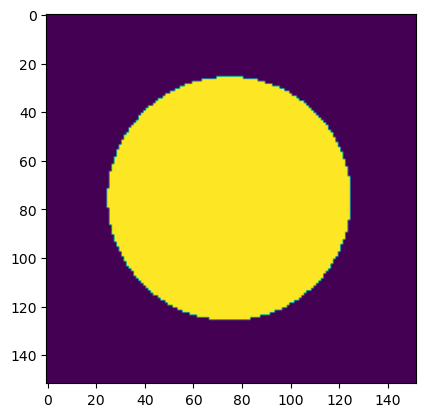

In [19]:
plt.imshow(mask)

In [20]:
np.shape(my_array_masked)

NameError: name 'my_array_masked' is not defined

In [347]:
#np.sort(my_array_masked)

In [348]:
np.unique(my_array_masked)

array([-0.00000000e+00,  6.75448508e-04,  4.57122456e-03, ...,
        2.11311603e+00,  2.11981416e+00,  2.28767133e+00])

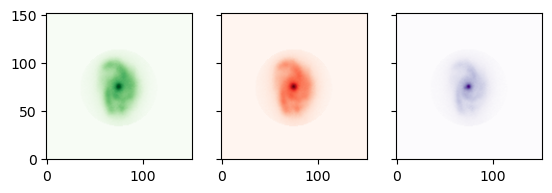

In [353]:

# Display the image
# plt.imshow(my_array_masked)
# plt.show()

plt.figure()
ax1=plt.subplot(131)
plt.imshow(green[:,:,0], origin='lower', cmap='Greens')
plt.subplot(132, sharey=ax1)
plt.imshow(red[:,:,1], origin='lower', cmap='Reds')
plt.tick_params('y', labelleft=False)
plt.subplot(133, sharey=ax1)
plt.imshow(purple[:,:,2], origin='lower', cmap='Purples')
plt.tick_params('y', labelleft=False);

In [447]:
g = np.ravel(np.array(green))
r = np.ravel(np.array(red))
p = np.ravel(np.array(purple))

In [626]:
gp = g[g > 0]
rp = r[r > 0]
pp = p[p > 0]

In [627]:
# plt.hist(gp, bins =70)
# plt.hist(rp, bins = 70)
# plt.hist(pp, bins = 70)

In [628]:
n = len(gp)
    
sorted_arr = np.sort(gp)
    
numerator = np.sum([((2*i - n - 1) * sorted_arr[i-1]) for i in range(1, n+1)])

denominator =  np.mean(sorted_arr)*n*(n-1)

gini_g = (numerator) / (denominator)
                      
print('gini_green =',gini_g)

gini_green = 0.4567678426798266


In [629]:
n = len(rp)
    
sorted_arr = np.sort(rp)
    
numerator = np.sum([((2*i - n - 1) * sorted_arr[i-1]) for i in range(1, n+1)])

denominator =  np.mean(sorted_arr)*n*(n-1)

gini_r = (numerator) / (denominator)
                      
print('gini_red =',gini_r)

gini_red = 0.45362307084198644


In [630]:
n = len(pp)
    
sorted_arr = np.sort(pp)
    
numerator = np.sum([((2*i - n - 1) * sorted_arr[i-1]) for i in range(1, n+1)])

denominator =  np.mean(sorted_arr)*n*(n-1)

gini_p = (numerator) / (denominator)
                      
print('gini_purple =',gini_p)

gini_purple = 0.46051977117667736


In [631]:
all = np.concatenate((gp, rp, pp), axis=0)

In [632]:
all.shape

(15081,)

In [633]:
n = len(all)
    
sorted_arr = np.sort(all)
    
numerator = np.sum([((2*i - n - 1) * sorted_arr[i-1]) for i in range(1, n+1)])

denominator =  np.mean(sorted_arr)*n*(n-1)

gini_all = (numerator) / (denominator)
                      
print('gini_all =',gini_all)

gini_all = 0.5009726938434089


In [634]:
#TEST
arr = np.array([1, 4, 2, 6, 3, 5])

n = len(arr)
    
sorted_arr = np.sort(arr)
    
numerator = np.sum([((2*i - n - 1) * sorted_arr[i-1]) for i in range(1, n+1)])

denominator =  np.mean(sorted_arr)*n*(n-1)

gini_coeff = (numerator) / (denominator)
                      
print(gini_coeff)

0.3333333333333333


In [635]:
#sorted_arr
print(denominator)

#sorted_arr

105.0
